# Jupiter Tisserand parameters

Figure 3.10 from Chapter 3 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Jovian Tisserand parameter T<sub>J</sub> for asteroids (black points) and comets (white circles). The vertical
dashed line indicates the Sun – Jupiter distance, ajup = 5.20 au; the curved solid line is Tjup,max.

In [7]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [8]:
plotFile = 'Fig3_10.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Asteroid data

Asteroid data are in a CSV file pre-selected from the MPCORB database for all asteroids in the Main Belt
plus the Hungarias, Hildas, and Jupiter Trojans brighter than H=16.  This is faster
than reading all roughly 1.3 million entries in the full MPCORB database.

In [9]:
mpcFile = 'Asteroids/MPC_MainBeltPlus.csv' 

data = pd.read_csv(mpcFile,comment='#')

aMB = np.array(data['a'])
eMB = np.array(data['e'])
iMB = np.radians(np.array(data['i']))

aMin = 2.0
aMax = 7.0 

## Comets

Read in comet orbit data from `AllCometEls.txt` from the MPC.  Here we use a fixed-width file with a table
of the widths from https://www.minorplanetcenter.net/iau/info/CometOrbitFormat.html.

In [10]:
dataFile = 'Asteroids/MPC_AllCometEls.txt'

cometCols = [(0,4), (4,5), (5,12), (14,29), (30,39), (41,49), (51,59), (61,69), (71,79), (81,89),
            (91,95), (96,100), (102,158), (159,-1)]

data = pd.read_fwf(dataFile,colspecs=cometCols,header=None,comment='#')

q = np.array(data[4]) # perihelion in au
e = np.array(data[5]) # eccentricity
i = np.array(data[8]) # inclination in degrees

# compute semimajor axes

a = q/(1-e)

# restrict to aMin to aMax

iComets = np.where((a >= aMin) & (a <= aMax))[0]

aC = a[iComets]
eC = e[iComets]
iC = np.radians(i[iComets])

## Jupiter orbital data

Data from the NASA/JPL Solar System Dynamics database

In [11]:
aJup = 5.20288700 # au
eJup = 0.04838624
PJup = 4332.820129/365.25 # years
iJup = 1.30439695

## Compute the Jupiter Tisserand parameter

Compute 
\begin{equation}
   T_J = \frac{a_J}{a} + 2\left[\frac{a}{a_J}(1-e^2)\right]^{1/2}\cos i
\end{equation}
for all of the asteroids.

Also compute the maximum Jupiter Tisserand parameter
\begin{equation}
  T_{J,max} = \frac{a_J}{a} + 2\left(\frac{a}{a_J}\right)^{1/2}
\end{equation}

In [12]:
# asteroids

TJ = (aJup/aMB) + 2.0*np.sqrt((aMB/aJup)*(1-eMB*eMB))*np.cos(iMB)

# comets

TJc = (aJup/aC) + 2.0*np.sqrt((aC/aJup)*(1-eC*eC))*np.cos(iC) 

# T_J,max line

aTJ = np.linspace(aMin,aMax,101)
TJmax = (aJup/aTJ) + 2.0*np.sqrt(aTJ/aJup)

# axis limits

minTJ = 1.8
maxTJ = 4

## Figure 3.10

Plot asteroids as semi-transparent black dots since there are so many of them.  This will make a "point cloud"
plot.

Overlay the comets as white filled circles with a thin black border.

The T$_{J,max}$ line is plotted as a thick black line.  Indicate the location of Jupiter's orbit with
a thin, black vertical dashed line.  Uncomment other lines of code to show the locations of the main 
Jupiter mean-motion resonances.

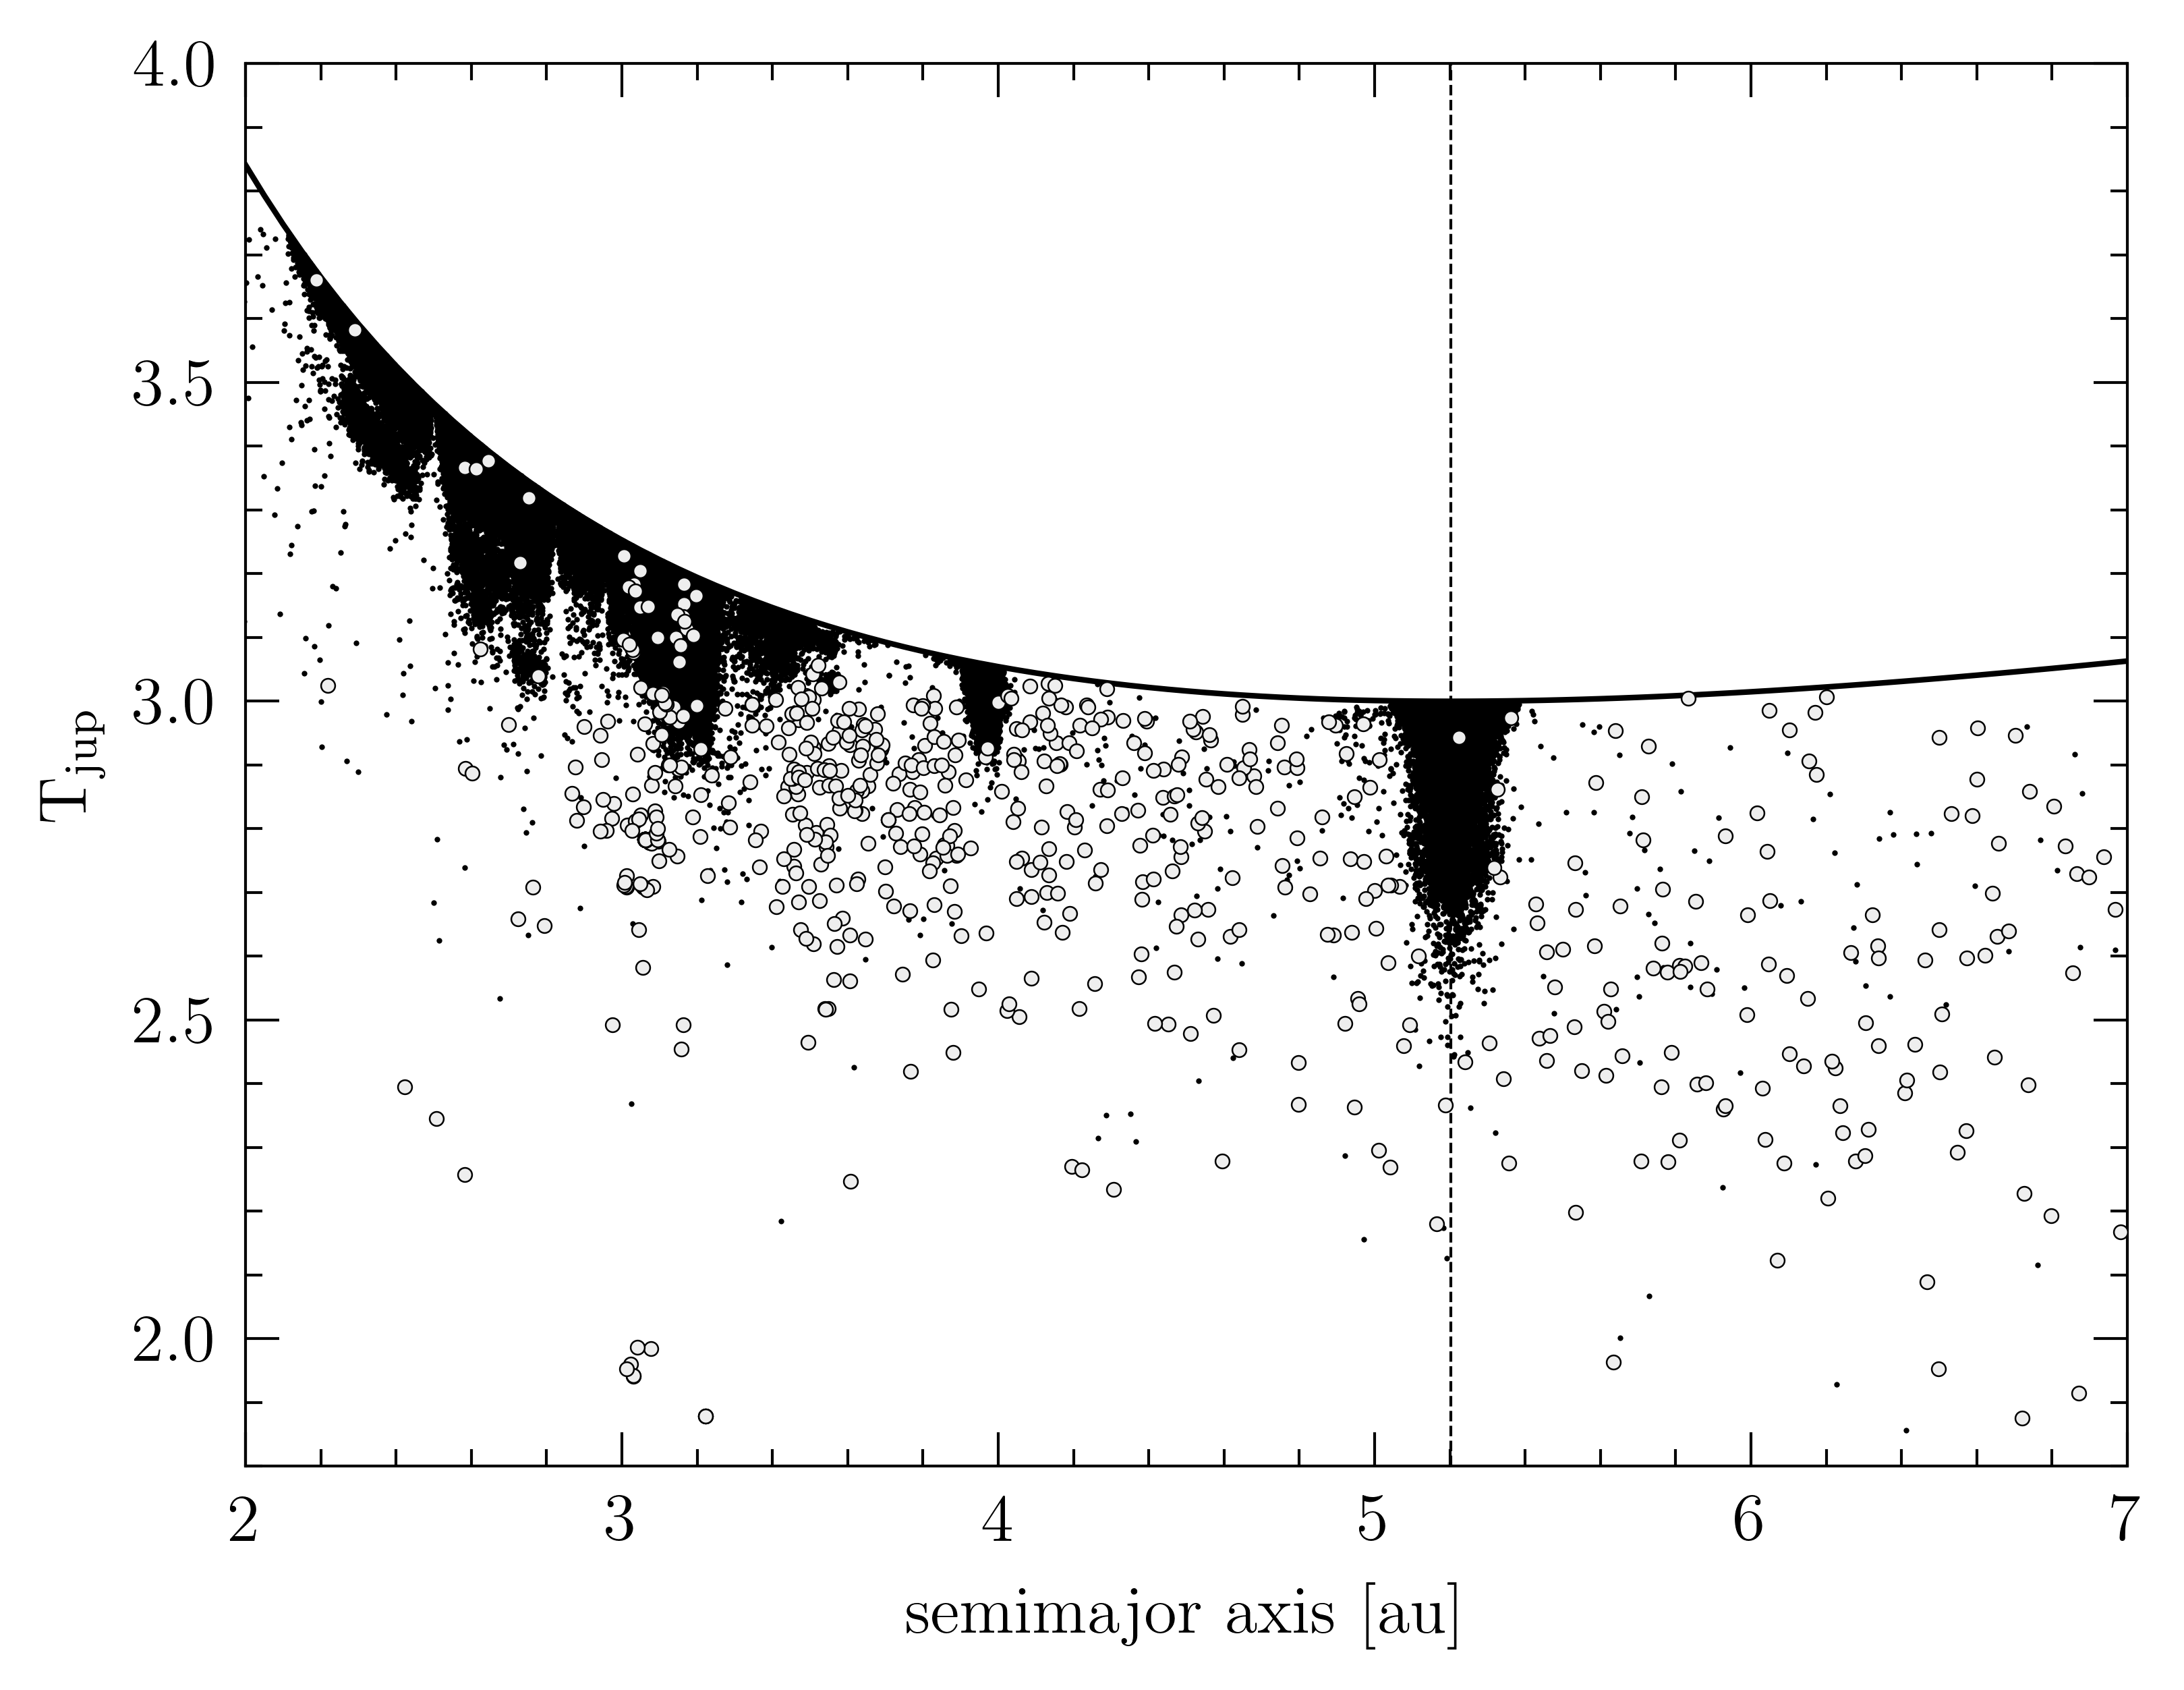

In [13]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(aMin,aMax)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xlabel(r'semimajor axis [au]',fontsize=axisFontSize)

ax.set_ylim(minTJ,maxTJ)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel(r'T$_{\rm jup}$',fontsize=axisFontSize)

# Asteroids as small back dots, comets as circles filled with light gray

ax.plot(aMB,TJ,'o',ms=1,mfc='black',mec=None,mew=0,alpha=1,zorder=10)
ax.plot(aC,TJc,'o',ms=2.5,mfc='#eeeeee',mec='black',mew=0.3,zorder=10)

# T_jup,max line

ax.plot(aTJ,TJmax,'-',color='black',lw=1,zorder=8)

# Jupiter orbit

ax.vlines([aJup],minTJ,maxTJ,ls=['--'],colors=['black'],lw=0.5,zorder=5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')